# BREAST CANCER DETECTION WITH ML

## Required Packages

In [16]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix

## Version Check

In [2]:
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))

Python: 3.8.11 (default, Aug  6 2021, 08:56:27) 
[Clang 10.0.0 ]
Numpy: 1.19.5
Matplotlib: 3.5.0
Pandas: 1.3.4
Scikit-learn: 0.23.2


## Dataset Load

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 
         'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
         'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(url, names=names).replace('?', np.nan).dropna()

In [4]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Preprocess data

In [5]:
# Drop useless feature for classification
df.drop(['id'], axis=1, inplace=True)

## Summarize Dataset

In [6]:
print(df.describe())


       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       683.000000         683.000000          683.000000   
mean          4.442167           3.150805            3.215227   
std           2.820761           3.065145            2.988581   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         683.000000              683.000000       683.000000   
mean            2.830161                3.234261         3.445095   
std             2.864562                2.223085         2.449697   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


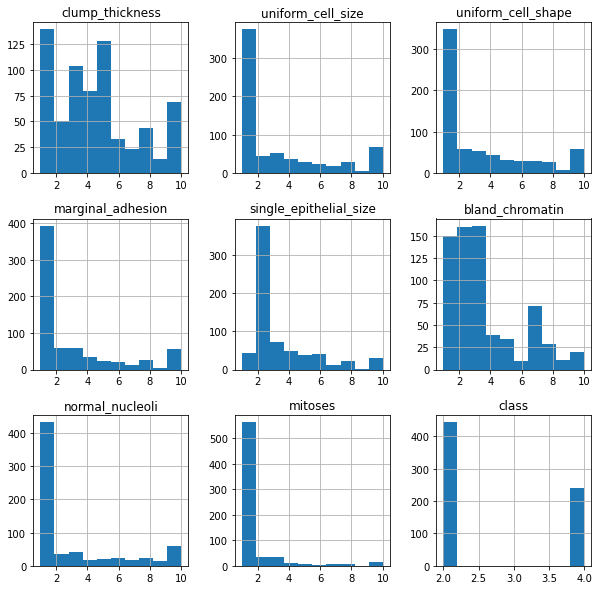

In [7]:
# Plot histograms for each variable
df.hist(figsize=(10, 10));

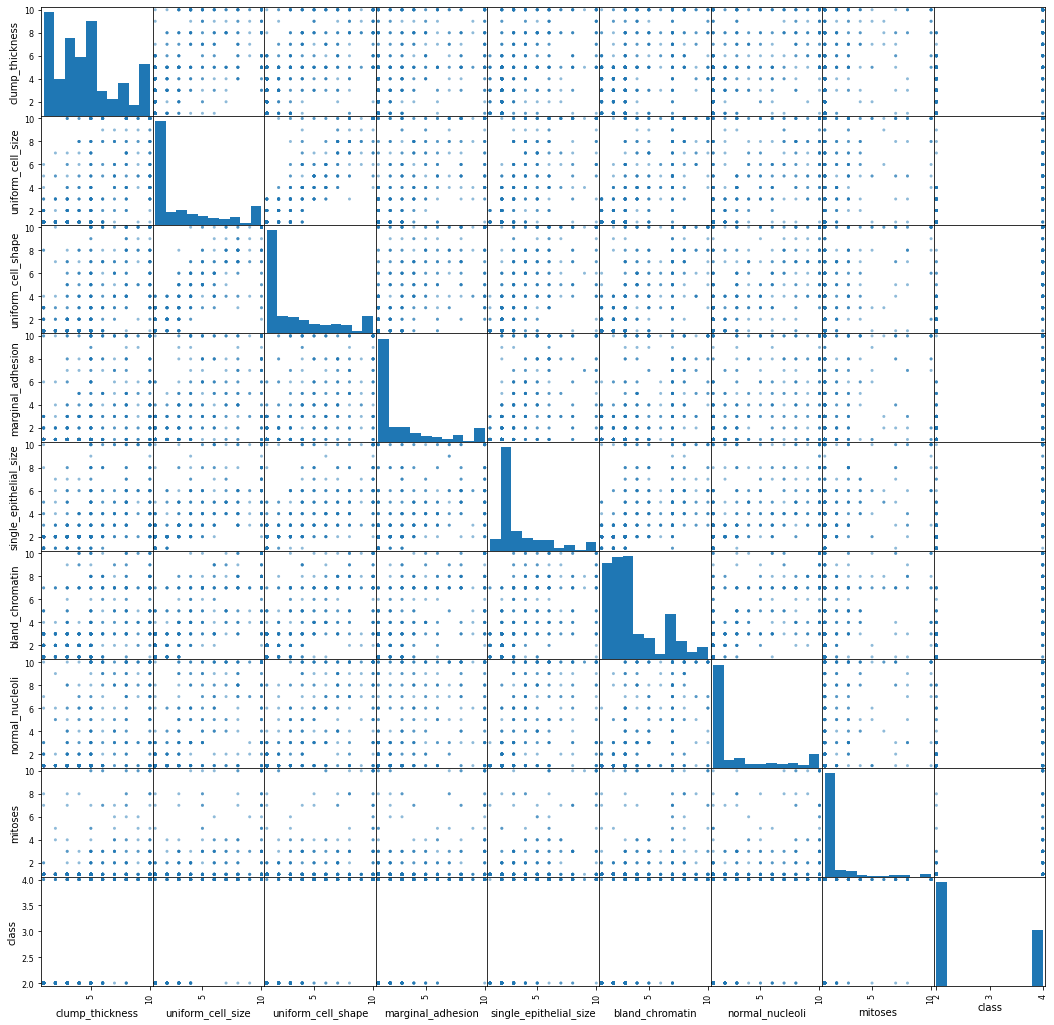

In [8]:
# Create scatter plot matrix
scatter_matrix(df, figsize=(18, 18));

## Split Train/Test data

In [9]:
X = df.drop(['class'], axis=1).to_numpy()
y = df['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Specify Test options

In [10]:
seed = 8
scoring = 'accuracy'

## Define the model to train

In [11]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.968956 (0.021568)
SVM: 0.967104 (0.027933)


## Make Predictions on validation dataset

In [12]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9635036496350365
              precision    recall  f1-score   support

           2       0.96      0.97      0.97        79
           4       0.96      0.95      0.96        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

SVM
0.9708029197080292
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        79
           4       0.97      0.97      0.97        58

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



## another way to get accuracy

In [13]:
clf = SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9708029197080292


## Testing with samples

In [14]:
example = np.array([[4, 2, 1, 1, 1, 2, 3, 2, 10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)`

[2]


In [15]:
example = np.array([[10, 2, 1, 1, 1, 2, 3, 2, 10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

[4]
